In [1]:
# Libraries
import os
import zipfile
import shutil
import random
import matplotlib.pyplot as plt
from shutil import copyfile
from re import sub


In [4]:
sourcePath = "../Robots_Datasets/"
print("Below listed the Classes of cats:  \n")

folders = []
for folder in os.listdir(sourcePath):
    print(f"{folder} has over {len(os.listdir(sourcePath + folder))} images")
    folders.append(folder)


print(f"There are currently: {len(folders)} class available in the dataset.")

Below listed the Classes of cats:  

Abyssinian has over 516 images
Bengal has over 514 images
Birman has over 514 images
Bombay has over 526 images
British Shorthair has over 400 images
Calico has over 533 images
Dilute Calico has over 414 images
Domestic Long Hair has over 405 images
Egyptian Mau has over 412 images
Himalayan has over 437 images
Maine Coon has over 512 images
Persian has over 510 images
Ragdoll has over 515 images
Russian Blue has over 515 images
Scottish Fold has over 368 images
Siamese has over 338 images
Sphynx has over 384 images
Turkish Angora has over 593 images
Tuxedo has over 507 images
There are currently: 19 class available in the dataset.


# Create Train Test Split Directories

In [5]:
#root directory
root_dir = "../ROBOTSDATASET"


def text_preprocessing(title):
    '''Processing text from the class to snake_case format for naming the class subset folder'''
    return '_'.join(sub('([A-Z][a-z]+)', r' \1',sub('([A-Z]+)', r' \1',title.replace('-', ' '))).split()).lower()
        

def create_train_test_dirs(root_path, folders):

    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(root_path, 'testing'))
    
    # training split dir
    for folder in folders:
        os.makedirs(os.path.join(root_path, f'training/{text_preprocessing(folder)}'))
        
    # test split dir
    for folder in folders:
        os.makedirs(os.path.join(root_path, f"testing/{text_preprocessing(folder)}"))
    

# calling the function to create directories split
create_train_test_dirs(root_dir, folders)

# Split Datasets into Training and Test sets

In [6]:
# split_data
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):

    files = []
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + "/" + file_name
        if os.path.getsize(file_path):
            files.append(file_name)
        else:
            print(f"{file_name} is zero length, so ignoring.")
    split_point = int(SPLIT_SIZE * len(files))
    shuffled_files = random.sample(files, len(files))
    training = shuffled_files[:split_point]
    testing = shuffled_files[split_point:]
    for f_train in training:
        copyfile((SOURCE + "/" + f_train) , (TRAINING + "/" + f_train))
    for f_test in testing:
        copyfile((SOURCE + "/" + f_test), (TESTING + "/" + f_test))



# Split the data into training and testing

In [7]:
# Define paths
DATASET_SOURCE_DIR = "../Robots_Datasets/"

TRAINING_DIR = "../ROBOTSDATASET/training/"
TESTING_DIR = "../ROBOTSDATASET/testing/"

# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
for folder in folders:
    TRAINING_CP_DIR = os.path.join(TRAINING_DIR, text_preprocessing(folder))
    TESTING_CP_DIR = os.path.join(TESTING_DIR, text_preprocessing(folder))
    split_data(os.path.join(DATASET_SOURCE_DIR, folder), TRAINING_CP_DIR, TESTING_CP_DIR, split_size)


# Visualize some of our sample images

In [9]:
# Walk through training and testing directory and list number of files
for dirpath, dirnames, filenames in os.walk('../ROBOTSDATASET/'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in ../ROBOTSDATASET/
There are 19 directories and 0 images in ../ROBOTSDATASET/testing
There are 0 directories and 52 images in ../ROBOTSDATASET/testing\abyssinian
There are 0 directories and 52 images in ../ROBOTSDATASET/testing\bengal
There are 0 directories and 52 images in ../ROBOTSDATASET/testing\birman
There are 0 directories and 53 images in ../ROBOTSDATASET/testing\bombay
There are 0 directories and 40 images in ../ROBOTSDATASET/testing\british_shorthair
There are 0 directories and 54 images in ../ROBOTSDATASET/testing\calico
There are 0 directories and 42 images in ../ROBOTSDATASET/testing\dilute_calico
There are 0 directories and 41 images in ../ROBOTSDATASET/testing\domestic_long_hair
There are 0 directories and 42 images in ../ROBOTSDATASET/testing\egyptian_mau
There are 0 directories and 44 images in ../ROBOTSDATASET/testing\himalayan
There are 0 directories and 52 images in ../ROBOTSDATASET/testing\maine_coon
There are 0 directories an

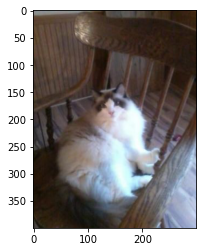

In [11]:
class_name = 'ragdoll'

t = random.sample(os.listdir(f'../ROBOTSDATASET/training/{class_name}/'), 3)[0]
ta=plt.imread(f'../ROBOTSDATASET/training/{class_name}/{t}')
plt.imshow(ta)